In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv (r"C:/Data/bats.csv")
tab = pd.crosstab(index=data["type"],columns="count") 
print(tab)

col_0  count
type        
1          4
2         12
3          4


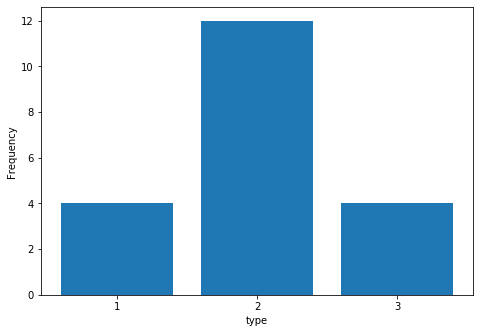

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
type = ['1', '2', '3']
counts = [4,12,4]
ax.bar(type,counts)
plt.xlabel('type')
plt.ylabel('Frequency')
plt.show()

In [3]:
########################  CHEST PAIN SAMPLE:

data = {'Yes': [46,37], 'No': [474,516]}

df = pd.DataFrame(data, columns =['Yes', 'No'])

tab = [ df['Yes']/(df['Yes'] + df['No']),  df['No']/(df['Yes'] + df['No']) ]
tab = np.asmatrix([tab[0],tab[1]])
tab = np.transpose(tab)
print('Conditional Probabilties ', '\n', tab)

prob = df['Yes']/(df['Yes'] + df['No']) 
print('RR = ', prob[0]/prob[1] ) #this is Relative Risk

odds = prob/(1-prob) #the odds of 'Yes'
print('OR = ', odds[0]/odds[1] ) ### this is odds ratio


Conditional Probabilties  
 [[0.08846154 0.91153846]
 [0.06690778 0.93309222]]
RR =  1.3221413721413722
OR =  1.3534040369483409


In [4]:
import scipy.stats as scst
obs = np.array([[46,474], [37,516]])
print(obs)
print (scst.chi2_contingency(obs, correction = True) ) #this will return:
#test statistic; p-value, dof, and expected values


[[ 46 474]
 [ 37 516]]
(1.4555294041803708, 0.2276427809700174, 1, array([[ 40.22367195, 479.77632805],
       [ 42.77632805, 510.22367195]]))


In [5]:
################ FISHER EXACT TEST
# CLARITIN SAMPLE:

import scipy.stats as scst
claritin = np.array([[4,184], [2,260]])
print(claritin)
scst.fisher_exact(claritin, alternative='two-sided')


[[  4 184]
 [  2 260]]


(2.8260869565217392, 0.24118420183181116)

In [6]:
############## MCNEMAR TEST:
from statsmodels.stats.contingency_tables import mcnemar
x = np.array([[25,1], [17,7]])
test1 = mcnemar(x, exact=False, correction=True)
print(test1)
# the McNemar test in R is equivalent to this test in Python but using approximate p-value.
# the McNemar test with e-xact p-value (which should be used when table has small cell count) is:
test2 = mcnemar(x, exact=True, correction=True)
print(test2)

pvalue      0.00040695201744495946
statistic   12.5
pvalue      0.00014495849609375
statistic   1.0


In [7]:
###############  POLITICAL EXAMPLE: 

obs = np.array([[762,327,468], [484,239,477]])
print(obs)
scst.chi2_contingency(obs, correction = True)


##############################

[[762 327 468]
 [484 239 477]]


(30.070149095754672,
 2.9535891832117595e-07,
 2,
 array([[703.67138194, 319.64526659, 533.68335147],
        [542.32861806, 246.35473341, 411.31664853]]))

In [8]:
def linear_by_linear_test(col1, col2, u, v):
    matrix = [col1, col2]
    row_total = [a + b for a,b in zip(col1, col2)]
    col_total = [sum(col1), sum(col2)]
    n = sum(row_total)
    
    row_p = [x / n for x in row_total]
    ubar = sum([a*b for a,b in zip(row_p, u)])
    col_p = [x / n for x in col_total]
    vbar = sum([a*b for a,b in zip(col_p, v)])
    
    numerator = 0
    for i in range(len(u)):
        for j in range(len(v)):
            ui = u[i]
            vj = v[j]
            pij = matrix[j][i] / n
            numerator += (ui - ubar) * (vj - vbar) * pij

    
    denominator = (sum([row_p[i] * (u[i] - ubar)**2 for i in range(len(u))]) * \
                   sum([col_p[j] * (v[j] - vbar)**2 for j in range(len(v))]))**0.5
    
    r = numerator / denominator
    M = (n-1) * r**2
    p_value = 1- scst.chi2.cdf(M, 1)
    return "M is {} and two sided p-value is {}".format(M,p_value)



In [11]:
# test using lecture example

col1 = [17066, 14464, 788, 126, 37]
col2 = [48, 38, 5, 1, 1]
u = [0, 0.5, 1.5, 4, 7]
#u = [1,2,3,4,5]
v = [0, 1]

linear_by_linear_test(col1, col2, u, v)

'M is 6.569932245990481 and two sided p-value is 0.01037158991663134'

In [15]:
# Linear-by-Linear association test
# Using a built-in command in Python:

import statsmodels.api as sm

table = np.array([[17066, 14464, 788, 126, 37],[48, 38, 5, 1, 1]])

print(table)

[[17066 14464   788   126    37]
 [   48    38     5     1     1]]


In [17]:
ct = sm.stats.Table(np.asarray(table))

row_scores = np.asarray([0,1]) # scores for 2 rows

col_scores = np.asarray([0,0.5,1.5,4,7]) # scores for 5 columns

print(ct.test_ordinal_association(row_scores=row_scores, col_scores=col_scores))

null_mean   26.307745441149383
null_sd     4.366536892904495
pvalue      0.010371589916631332
statistic   37.5
zscore      2.5631879068828503
